In [63]:
import pandas as pd

file_path = 'C:/Users/LENOVO/Downloads/bank/bank.csv'  
data = pd.read_csv(file_path,delimiter=";")

data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [64]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [65]:
# Get an overview of the dataset
data.info()

# Check for missing values
data.isnull().sum()

# Summary statistics of numerical features
data.describe()

# Checking the distribution of the target variable
data['y'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


y
no     4000
yes     521
Name: count, dtype: int64

In [66]:
#Checking for duplicates
data.duplicated().sum()

0

In [67]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


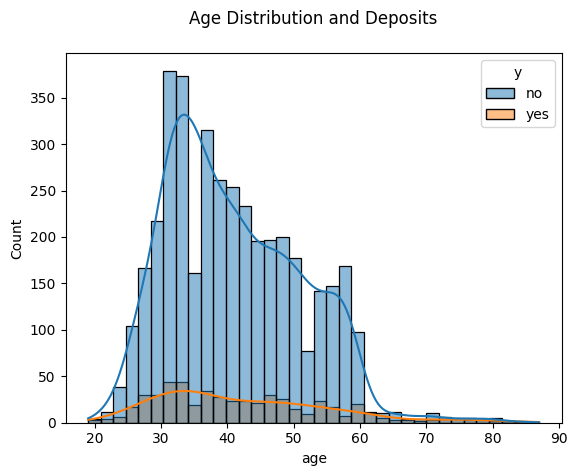

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x="age", data=data, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

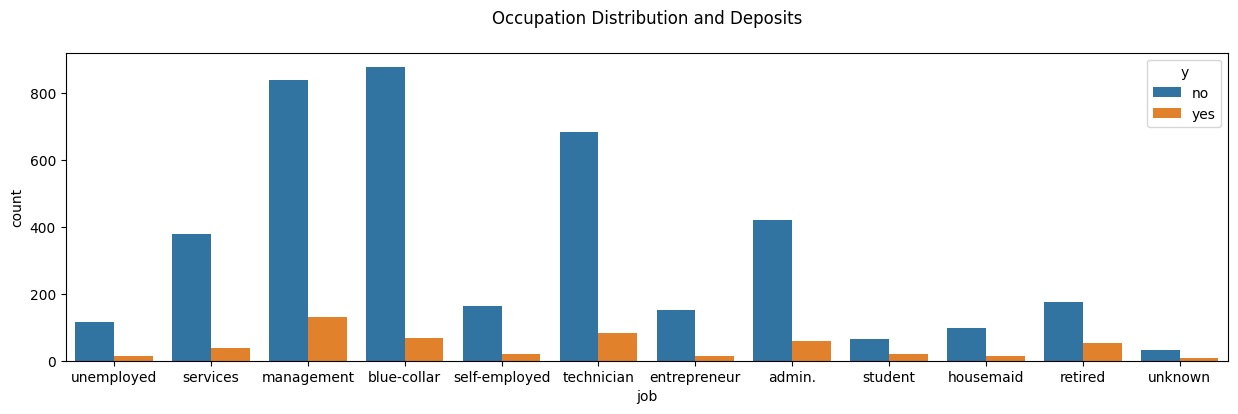

In [69]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= data, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

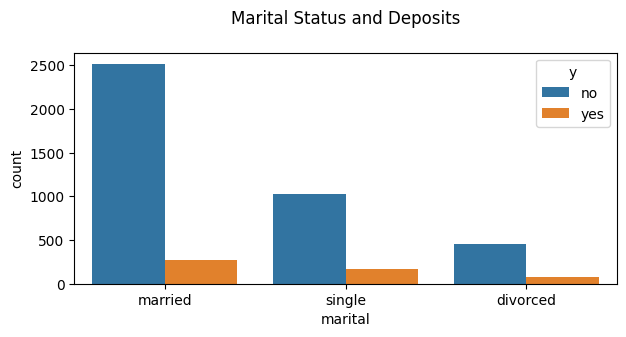

In [70]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= data, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

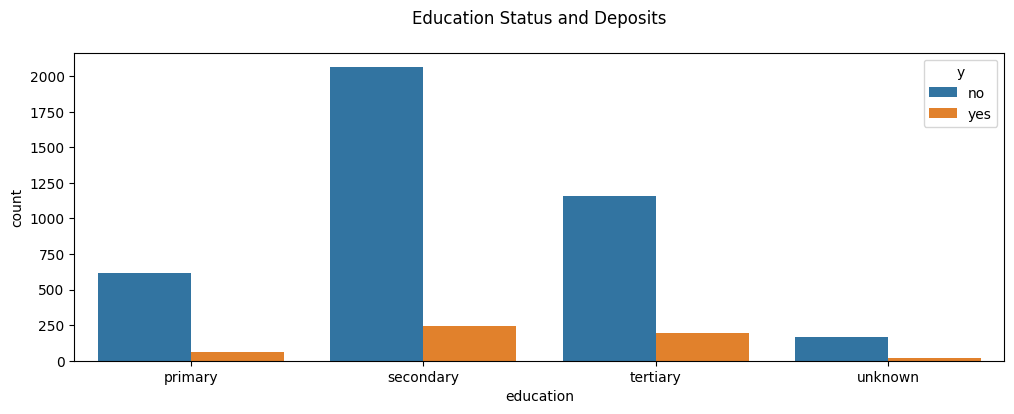

In [71]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= data, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

In [72]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [73]:
data.default.value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

In [74]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


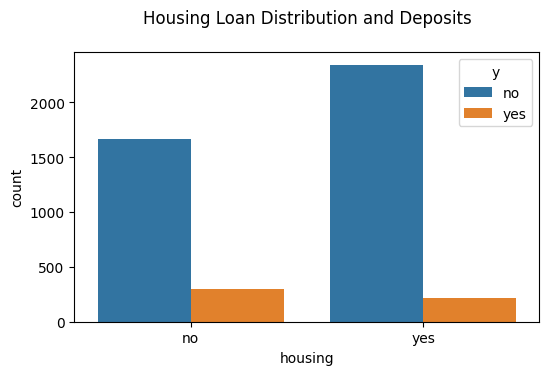

In [75]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= data, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

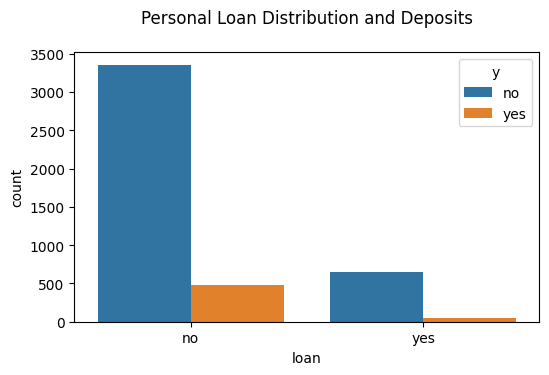

In [76]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= data, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

In [77]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


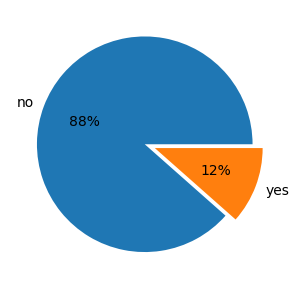

In [78]:
d=data
#Count of Outcome
d.y.value_counts()
keys = d.y.value_counts().index
d = d.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(d,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

In [79]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [81]:
cols = data.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [87]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()

data[cols] = data[cols].apply(le.fit_transform)
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0


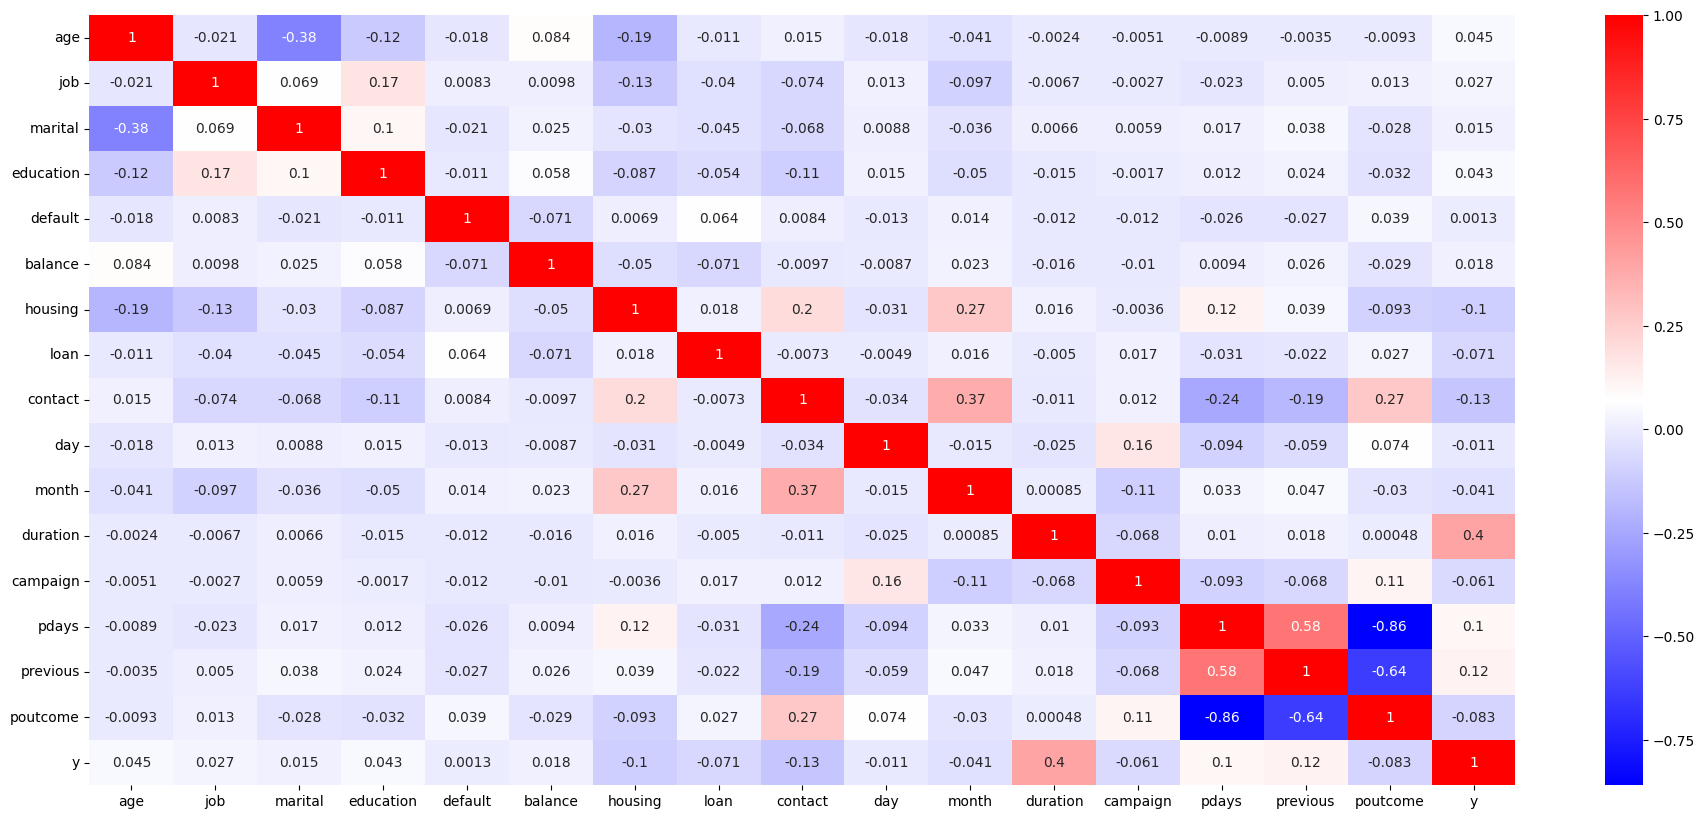

In [91]:
plt.figure(figsize=(23,10))
sns.heatmap(data.corr(), cmap='bwr', annot=True)
plt.show()

In [93]:
#Splitting input and output
X = data.drop("y", axis=1)
y = data.y

In [94]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [95]:
from sklearn.model_selection import train_test_split, cross_val_score
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [96]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [97]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))

Train Score: 1.0
Test Score: 0.8533529845246868


In [98]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.870732597436359

In [101]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1195
           1       0.39      0.42      0.41       162

    accuracy                           0.85      1357
   macro avg       0.66      0.67      0.66      1357
weighted avg       0.86      0.85      0.86      1357



In [112]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [113]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9244627054361567
Test Score: 0.8695652173913043


In [114]:
pred_y = clf.predict(test_X)

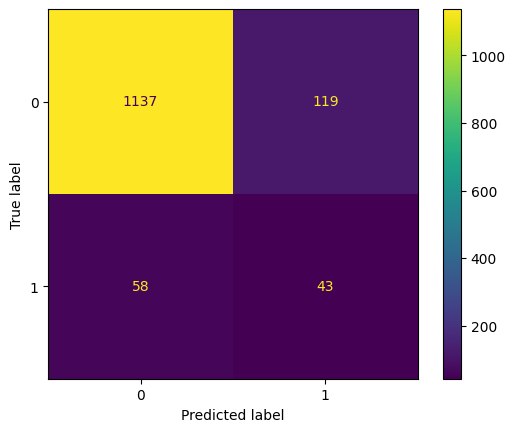

In [115]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [116]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1256
           1       0.27      0.43      0.33       101

    accuracy                           0.87      1357
   macro avg       0.61      0.67      0.63      1357
weighted avg       0.90      0.87      0.88      1357



In [117]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 86.95652173913044


In [118]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  86.80811808118081


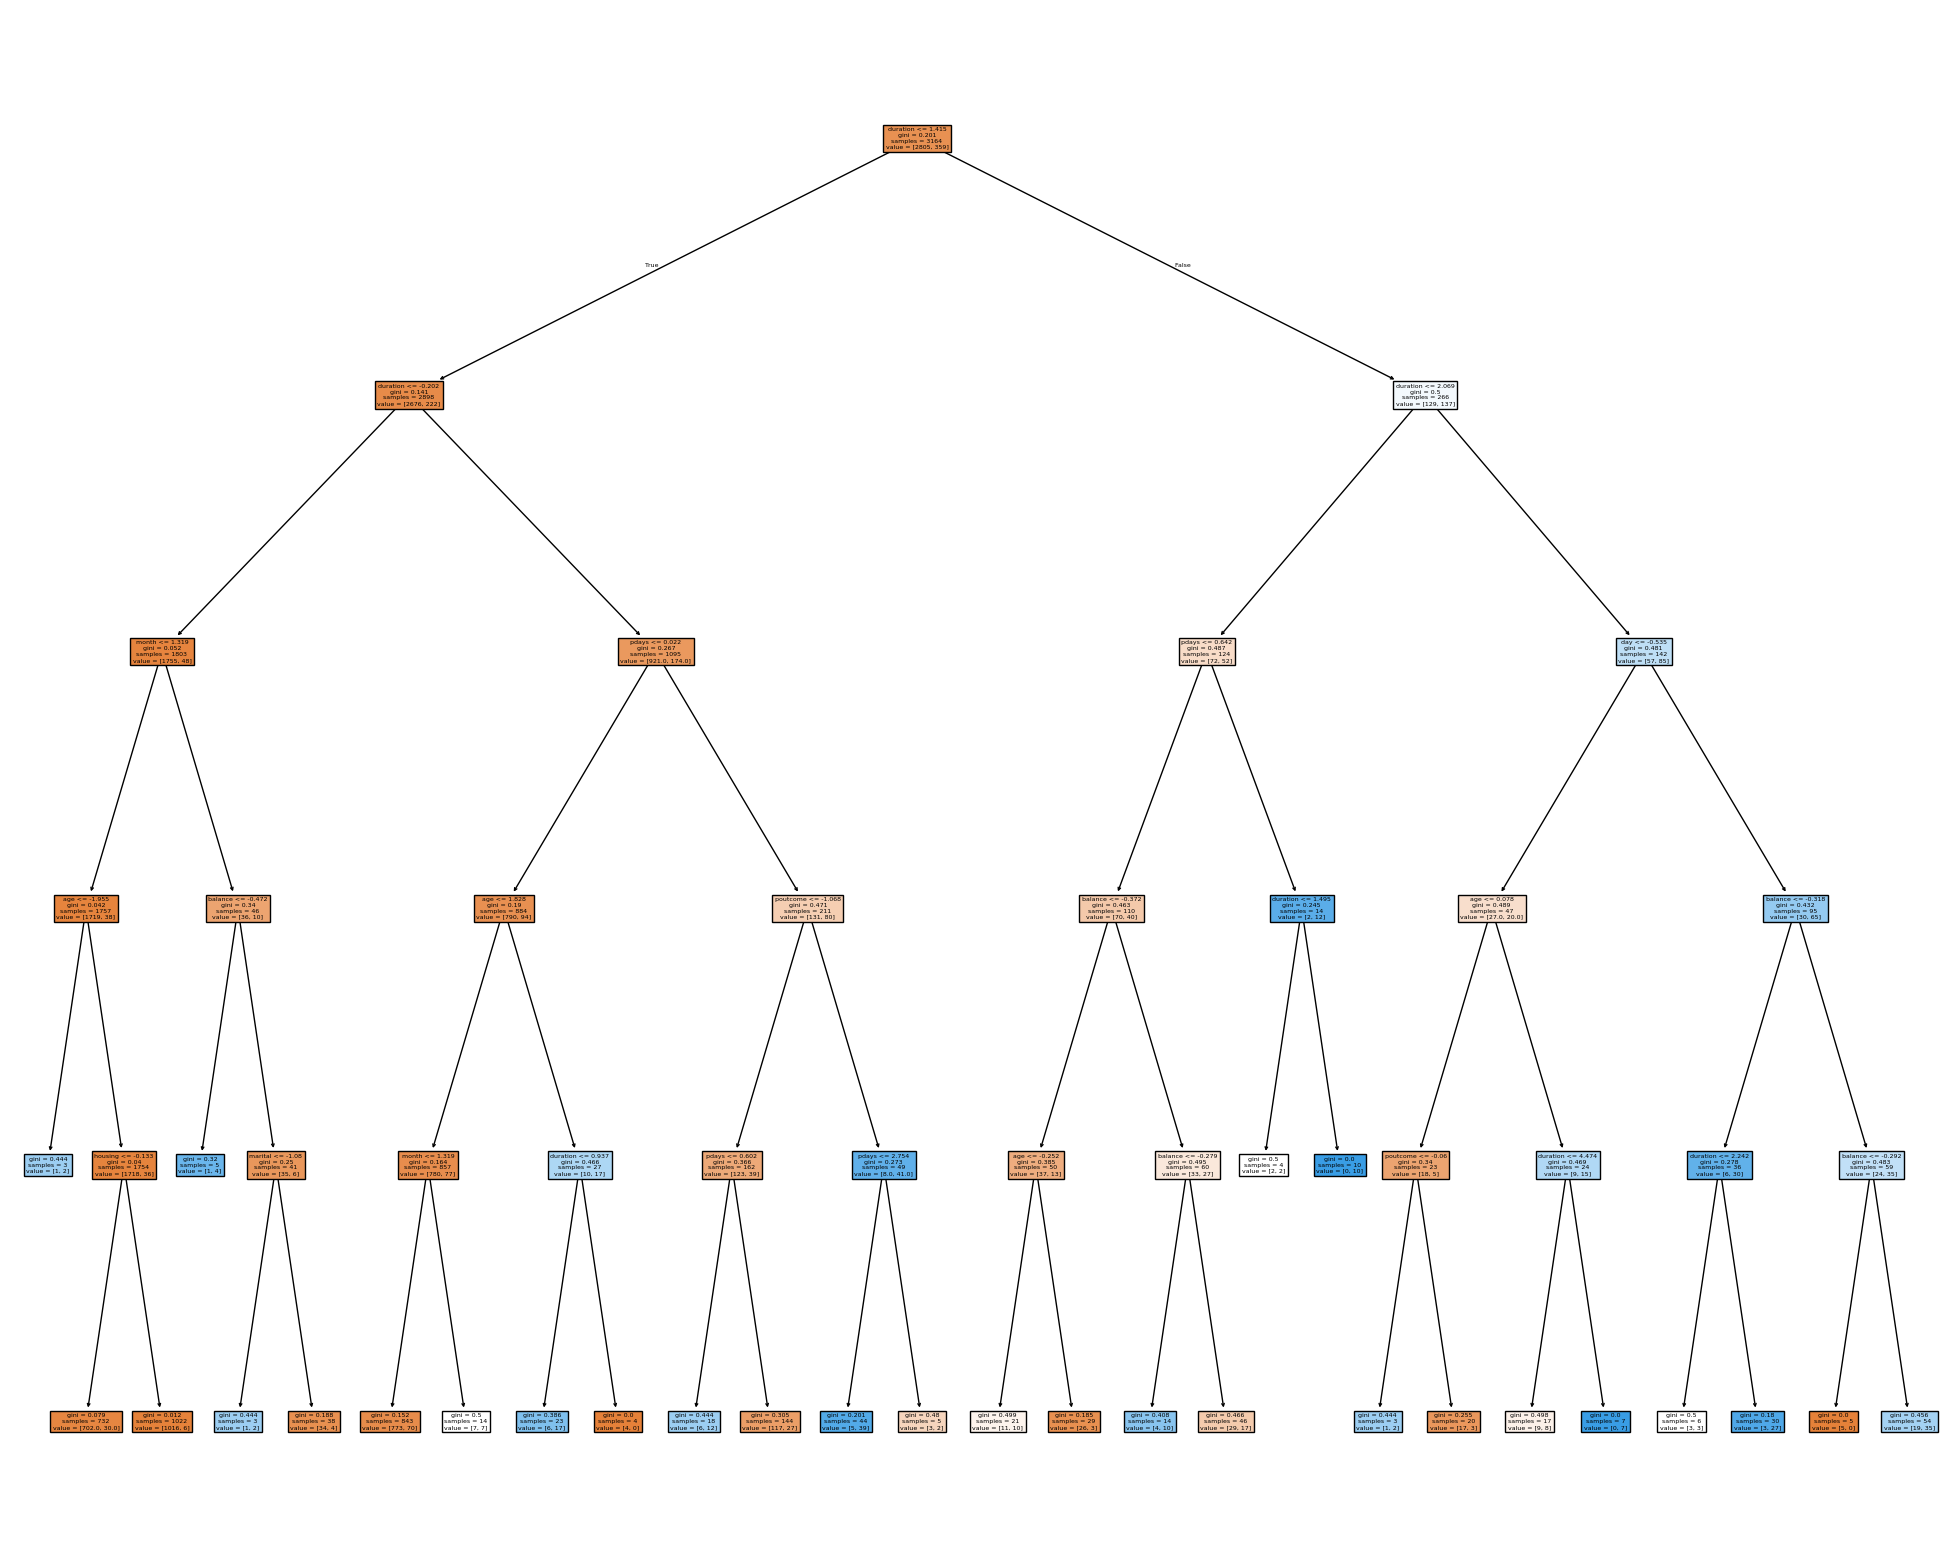

In [119]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)